In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [4]:
unique_words = []
with open("un_words.csv") as f:
    for line in f:
        unique_words.append(line.strip())

In [5]:
def load_embeddings(file_name):
    vocab = []
    word_embedding = {}
    with open(file_name) as f:
        for line in f:
            _line = line.split()
            word = _line[0]
            vector = [float(x) for x in _line[1:]]
            if len(vector) == 300:
                l2 = math.sqrt(sum([x*x for x in vector]))
                _vector = [x / l2 for x in vector]
                vocab.append(word)
                word_embedding[word] = _vector
            else:
                print(word)
    return vocab, word_embedding

In [6]:
print("loading embeddings....")
vocab, word_embedding = load_embeddings("data/vectors.vec")
print(" - done loading")


loading embeddings....
 - done loading


In [200]:
def display_closestwords_tsnescatterplot(words, word_embeddings):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            print(word)
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(10,0), textcoords='offset points')
        plt.quiver(0,0, x, y, angles='xy', scale_units='xy', scale=1)
        print(label,x,y)
    
    plt.xlim(x_coords.min()-10, x_coords.max()+10)
    plt.ylim(y_coords.min()-10, y_coords.max()+10)
    plt.grid(b=True, which='major') #<-- plot grid lines
    plt.plot(0,0,'ok') #<-- plot a black point at the origin
    plt.show()
    print(unique_words)

movie 238.31009 -174.50853
composed 36.622463 -320.9156
book -109.76398 -119.21317
writen 91.923546 27.193834


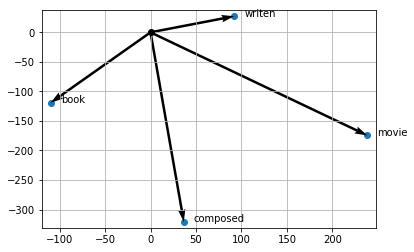

['writers', 'actor', 'servants', 'comedies', 'engineering', 'cooking', 'k', 'soup', 'novels', 'gadgets', 'dishes', 'writings', 'performance', 'books', 'electronics', 'kitchen', 'actors', 'comedy', 'john', 'characters', 'performances', 'dvd']


In [201]:
display_closestwords_tsnescatterplot(["movie","composed","book","writen"],word_embedding)

In [330]:
def display_closestwords_tsnescatterplot(words, word_embeddings):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            print(word)
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    
    
    x_coords=np.append(x_coords,x_coords[1]-x_coords[0])
    y_coords=np.append(y_coords,y_coords[1]-y_coords[0])
    word_labels.append("diff")

    for label, x, y in zip(word_labels, x_coords, y_coords):
        if label == "diff":
            plt.annotate(label+" vector", xy=(16, -68), xytext=(5,15), textcoords='offset points')
            plt.quiver( x_coords[2], y_coords[2], -x,-y,angles='xy', scale_units='xy', scale=1)
            plt.annotate(label+" vector", xy=(140, -280), xytext=(5,15), textcoords='offset points')
            plt.quiver( x_coords[1], y_coords[1], -x,-y,angles='xy', scale_units='xy', scale=1)
            continue
        plt.annotate(label, xy=(x, y), xytext=(10,0), textcoords='offset points')
        plt.quiver(0,0, x, y, angles='xy', scale_units='xy', scale=1)
        print(label,x,y)
    plt.plot(x_coords[2:4], y_coords[2:4], '.r-')
    plt.plot(x_coords[0:2], y_coords[0:2], '.r-')
    plt.xlim(x_coords.min()-10, x_coords.max()+10)
    plt.ylim(y_coords.min()-10, y_coords.max()+10)
    plt.grid(b=True, which='major') #<-- plot grid lines
    plt.plot(0,0,'ok') #<-- plot a black point at the origin
    plt.show()
    print(unique_words)

movie 238.31009 -174.50853
composed 36.622463 -320.9156
book -109.76398 -119.21317
writen 91.923546 27.193834


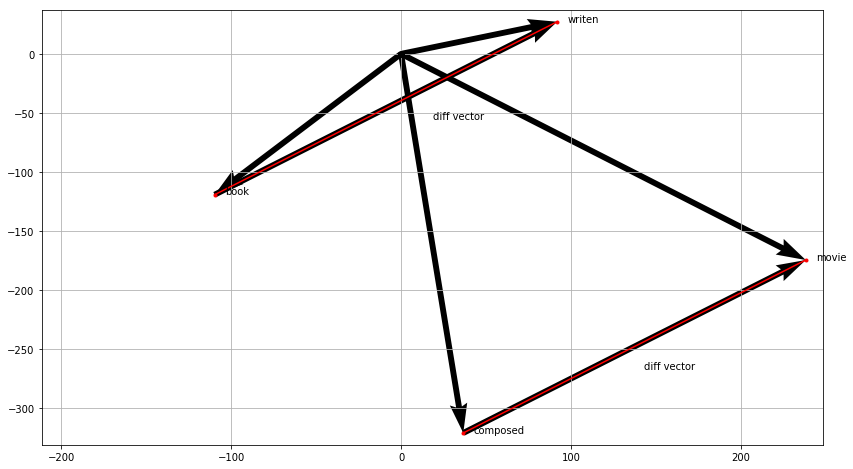

['writers', 'actor', 'servants', 'comedies', 'engineering', 'cooking', 'k', 'soup', 'novels', 'gadgets', 'dishes', 'writings', 'performance', 'books', 'electronics', 'kitchen', 'actors', 'comedy', 'john', 'characters', 'performances', 'dvd']


In [331]:
display_closestwords_tsnescatterplot(["movie","composed","book","writen"],word_embedding)

In [279]:
def display_closestwords_tsnescatterplot(words, word_embeddings):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            print(word)
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(10,0), textcoords='offset points')
        plt.quiver(0,0, x, y, angles='xy', scale_units='xy', scale=1)
        print(label,x,y)
    
    plt.xlim(x_coords.min()-10, x_coords.max()+10)
    plt.ylim(y_coords.min()-10, y_coords.max()+10)
    plt.grid(b=True, which='major') #<-- plot grid lines
    plt.plot(0,0,'ok') #<-- plot a black point at the origin
    plt.show()
    print(unique_words)

movie 238.31009 -174.50853
composed 36.622463 -320.9156
book -109.76398 -119.21317
writen 91.923546 27.193834


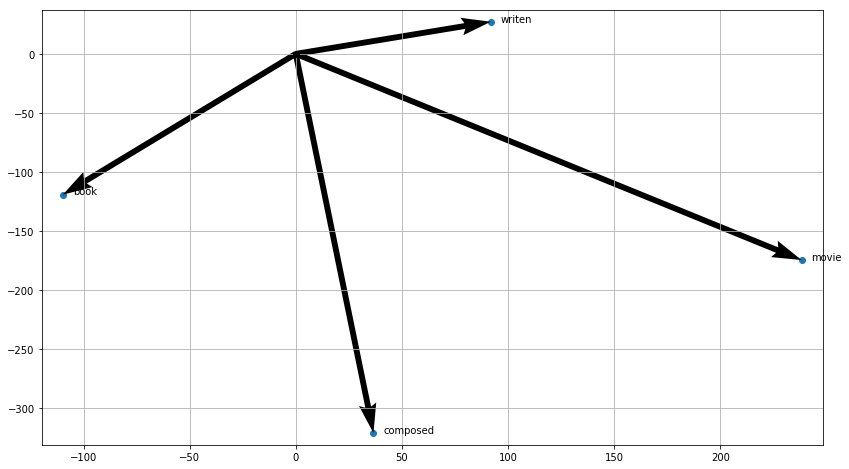

['writers', 'actor', 'servants', 'comedies', 'engineering', 'cooking', 'k', 'soup', 'novels', 'gadgets', 'dishes', 'writings', 'performance', 'books', 'electronics', 'kitchen', 'actors', 'comedy', 'john', 'characters', 'performances', 'dvd']


In [280]:
display_closestwords_tsnescatterplot(["movie","composed","book","writen"],word_embedding)

In [338]:
from sklearn import preprocessing
def display_closestwords_tsnescatterplot(words, word_embeddings):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            print(word)
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))
    Y = min_max_scaler.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords,linewidths=10,c =["b","b","g","g"])
    c =["b","b","g","g"]
    for i,(label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        plt.annotate(label, xy=(x, y), xytext=(10,0), textcoords='offset points',fontsize=15)
        plt.quiver(0,0, x, y, angles='xy', scale_units='xy', scale=1)
        print(label,x,y)
    
    plt.xlim(x_coords.min()-1, x_coords.max()+1)
    plt.ylim(y_coords.min()-1, y_coords.max()+1)
    #plt.grid(b=True, which='major') #<-- plot grid lines
    #plt.plot(0,0,'ok') #<-- plot a black point at the origin
    plt.show()
    print(unique_words)

movie 10.0 4.2057767
composed 4.2056117 0.0
book 0.0 5.794224
writen 5.794385 9.999999


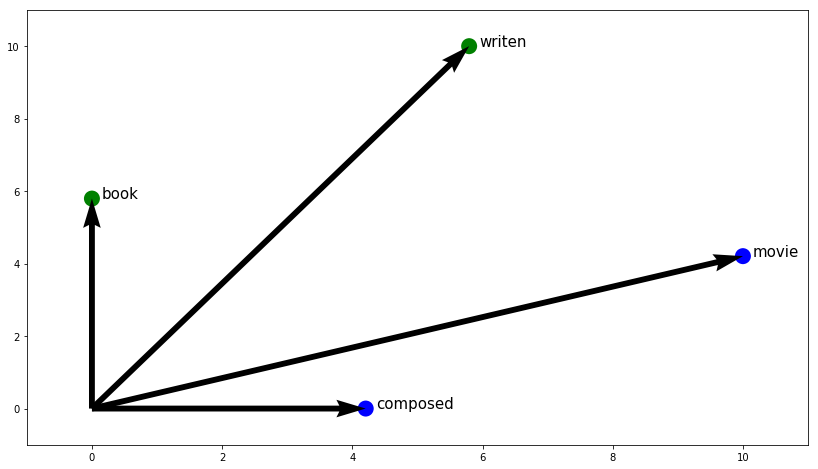

['writers', 'actor', 'servants', 'comedies', 'engineering', 'cooking', 'k', 'soup', 'novels', 'gadgets', 'dishes', 'writings', 'performance', 'books', 'electronics', 'kitchen', 'actors', 'comedy', 'john', 'characters', 'performances', 'dvd']


In [339]:
display_closestwords_tsnescatterplot(["movie","composed","book","writen"],word_embedding)

In [81]:
from sklearn import preprocessing
def display_closestwords_tsnescatterplot(words, word_embeddings):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            print(word)
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))
    Y = min_max_scaler.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    x_coords_scatter = Y[:, 0]
    y_coords_scatter = Y[:, 1]
    origo = [(0,0)]*4
    
    # Movie- composed

    x_coords_scatter = np.append(x_coords,x_coords[0]-x_coords[1])
    y_coords_scatter = np.append(y_coords,y_coords[0]-y_coords[1])
    x_coords = np.append(x_coords,-x_coords[1])
    y_coords = np.append(y_coords,-y_coords[1])
    word_labels.append("movie - composed")
    origo.append((x_coords[0],y_coords[0]))
    
    # Movie- composed + book

    x_coords = np.append(x_coords,x_coords[2])
    y_coords = np.append(y_coords,y_coords[2])
    word_labels.append("movie - composed + books")
    origo.append((x_coords_scatter[-1],y_coords_scatter[-1]))
    

    plt.scatter(x_coords_scatter, y_coords_scatter,linewidths=4,c =["#336699","#336699","#FF9933","#FF9933","w"])
    c =["#99CCCC","#669933","#996699","#FF9999","#669933","#996699"]
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        if i < 4:
            plt.annotate(label, xy=(x, y), xytext=(10,+1), textcoords='offset points',fontsize=12)
            plt.quiver(o[0],o[1], x, y, angles='xy',  alpha=0.4,scale_units='xy', scale=1,color=c[i], linewidth=1, LineStyle = "--")
        else:
            plt.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i], linewidth=1, LineStyle = "--")  
        print(label,x,y)
    
    plt.xlim(-1.5, x_coords.max()+1)
    plt.ylim(-1.5, y_coords.max()+1)
    #plt.grid(b=True, which='major') #<-- plot grid lines
    plt.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    plt.show()
    print(unique_words)

movie 10.0 4.2057767
composed 4.2056117 0.0
books 0.0 5.794224
writen 5.794385 9.999999
movie - composed -4.2056117 -0.0
movie - composed + books 0.0 5.794224


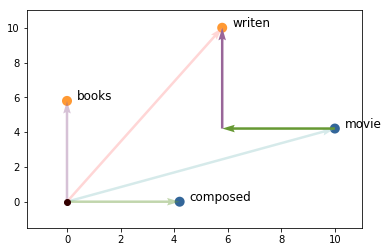

['writers', 'actor', 'servants', 'comedies', 'engineering', 'cooking', 'k', 'soup', 'novels', 'gadgets', 'dishes', 'writings', 'performance', 'books', 'electronics', 'kitchen', 'actors', 'comedy', 'john', 'characters', 'performances', 'dvd']


In [82]:
display_closestwords_tsnescatterplot(["movie","composed","books","writen"],word_embedding)

In [451]:
 [(0,0)]*4

[(0, 0), (0, 0), (0, 0), (0, 0)]

In [28]:
from sklearn import preprocessing
def display_closestwords_tsnescatterplot(words, word_embeddings):
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(18, 8))
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    min_max_scaler = preprocessing.MinMaxScaler()
    Y = min_max_scaler.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    x_coords_scatter = Y[:, 0]
    y_coords_scatter = Y[:, 1]
    origo = [(0,0)]*4
    
    
    
    ax1.scatter(x_coords_scatter, y_coords_scatter,linewidths=4,c =["w"]*4)#["#336699","#336699","#FF9933","#FF9933"])
    c =["#287585","#a8a97d","#e0d37c","#67b0aa"]
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        ax1.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(4,5), textcoords='offset points',fontsize=12)
        ax1.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i], linewidth=1,alpha = 0.7)

    ax1.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    ax1.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=12)

    
    # Create the new vectors
    # DVD - composed
    x_coords_scatter = np.append(x_coords,x_coords[0]-x_coords[1])
    y_coords_scatter = np.append(y_coords,y_coords[0]-y_coords[1])
    x_coords = np.append(x_coords,-x_coords[1])
    y_coords = np.append(y_coords,-y_coords[1])
    word_labels.append(r"$-\vec{composed}$")
    origo.append((x_coords[0],y_coords[0]))
    
    # Movie- composed + book
    x_coords = np.append(x_coords,x_coords[2])
    y_coords = np.append(y_coords,y_coords[2])
    word_labels.append(r"$+\vec{books}$")
    origo.append((x_coords_scatter[-1],y_coords_scatter[-1]))
    
    
    # Actual DVD - composed
    x_coords = np.append(x_coords,x_coords_scatter[-1])
    y_coords = np.append(y_coords,y_coords_scatter[-1])
    word_labels.append(r"$\vec{dvd}-\vec{composed}$")
    origo.append((0,0))
    
    
    c =["#287585","#a8a97d","#e0d37c","#67b0aa","#a8a97d","#e0d37c","#67b0aa"]
    
    

    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        if i< 3:
            if i == 1 or i == 2:
                a = 0.2
            else: 
                a = 0.5
            #ax2.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(4,5), textcoords='offset points',fontsize=12)
            ax2.quiver(o[0],o[1], x, y, angles='xy',  scale_units='xy', scale=1,color=c[i],alpha =a)
        elif i == 3:
            ax2.annotate(r"%s"%(r"$\vec{write} =  $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-50,+30), textcoords='offset points',fontsize=12)
            ax2.annotate(r"%s"%(r"$\vec{dvd}- \vec{composed}+ \vec{books} $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-90,+10), textcoords='offset points',fontsize=12)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
        elif i == 4:
            ax2.annotate(r"%s"%(label), xy=((abs(x)-o[0])/2+o[0],o[1]), xytext=(-40,5), textcoords='offset points',fontsize=12)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.5)  
        elif i == 5:
            ax2.annotate(r"%s"%(label), xy=(o[0],(abs(y)-o[1])/2+o[1]), xytext=(4,50), textcoords='offset points',fontsize=12)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.5)  
        elif i == 6:
            ax2.annotate(r"%s"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(7,-10), textcoords='offset points',fontsize=12)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
    
    plt.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    ax2.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=12)


    f.savefig("vectors")

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


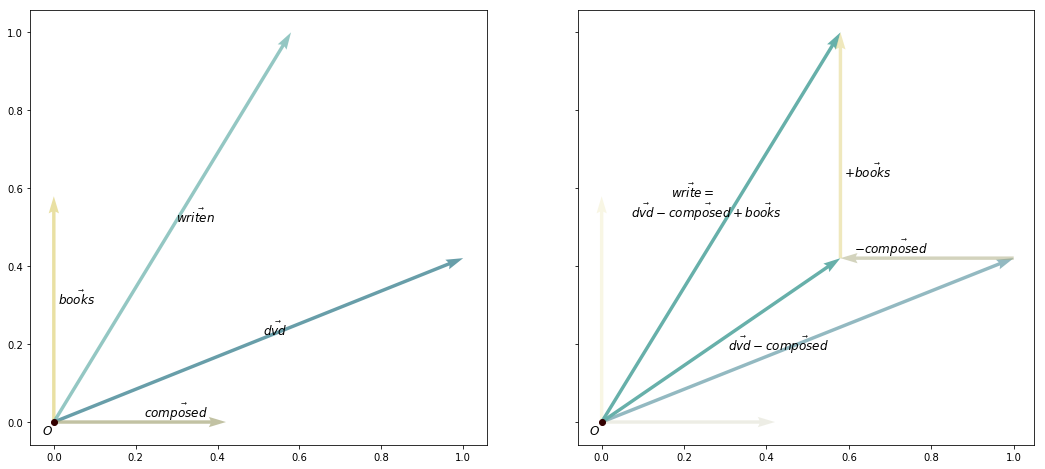

In [29]:
display_closestwords_tsnescatterplot(["dvd","composed","books","writen"],word_embedding)

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


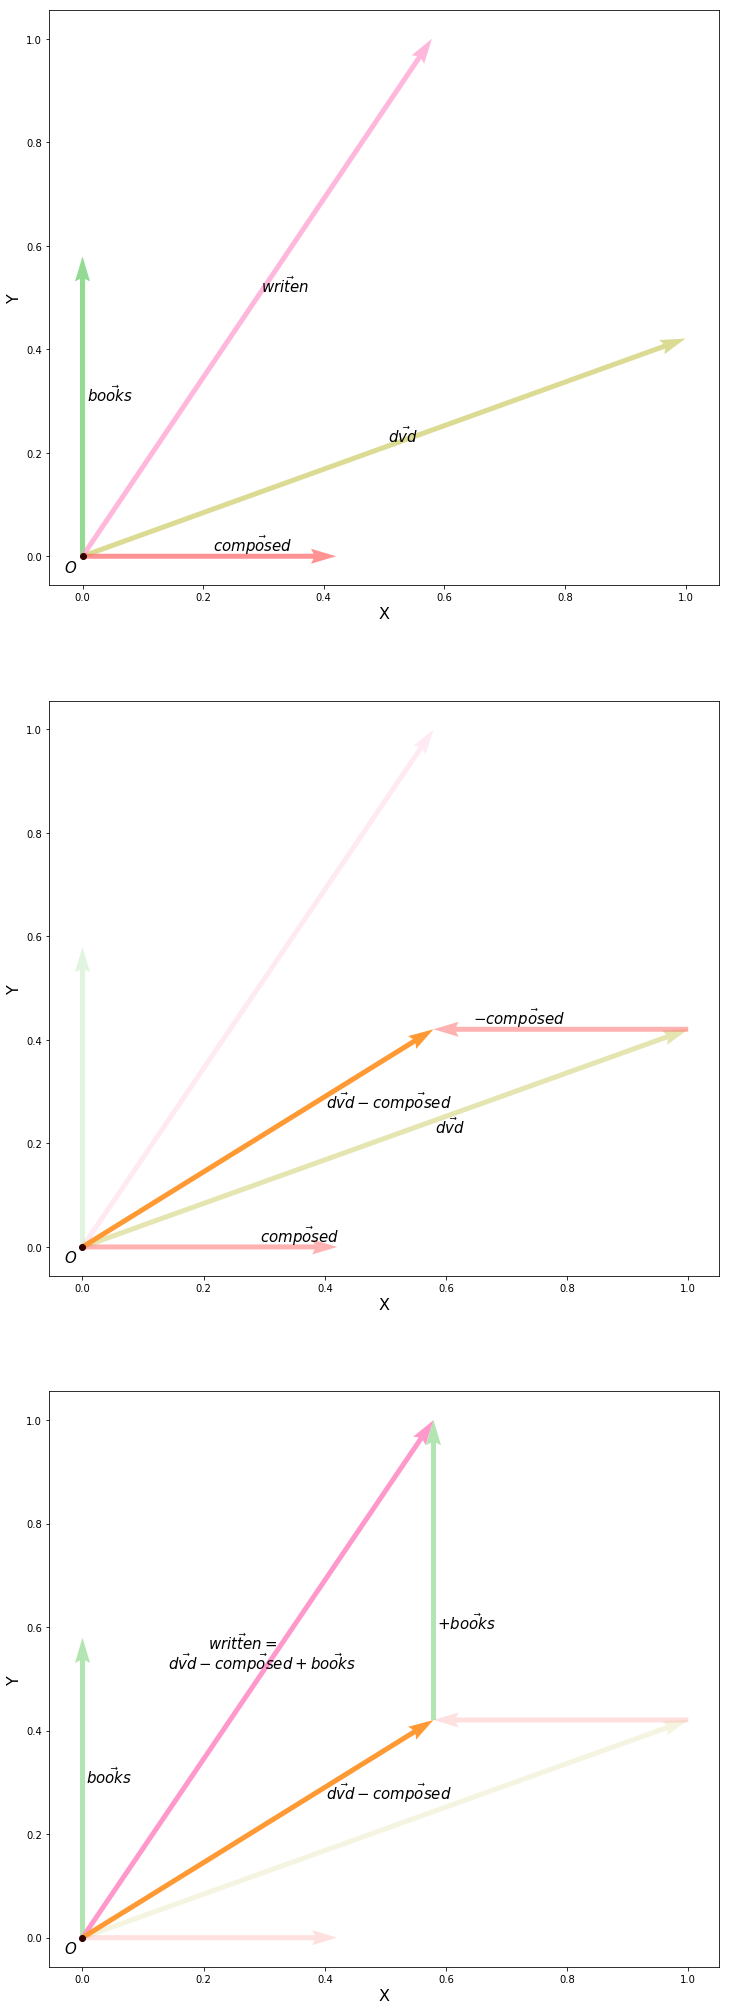

In [35]:
from sklearn import preprocessing
"""(ax1,ax2,ax3)"""
def display_closestwords_tsnescatterplot(words, word_embeddings):
    f, (ax1,ax2,ax3) = plt.subplots(3,1, sharey=True,figsize=(12, 36))
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        try:
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        except:
            word_labels.pop(word_labels.index(word))
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    min_max_scaler = preprocessing.MinMaxScaler()
    Y = min_max_scaler.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    x_coords_scatter = Y[:, 0]
    y_coords_scatter = Y[:, 1]
    origo = [(0,0)]*4
    
    
    #ax1.set_title("Fig 2: Vector Representation of Words")
    ax1.scatter(x_coords_scatter, y_coords_scatter,linewidths=4,c =["w"]*4)#["#336699","#336699","#FF9933","#FF9933"])
    c =["#cccc66","#ff6666","#66cc66","#ff99cc"]
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        ax1.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(4,5), textcoords='offset points',fontsize=15)
        ax1.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i], linewidth=1,alpha = 0.7)

    ax1.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    ax1.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=15)
    ax1.set_xlabel("X", fontsize = 16)
    ax1.set_ylabel("Y", fontsize = 16)
    extent = ax1.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig('ax1_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.2), dpi=600)
    
    # Create the new vectors
    # DVD - composed
    x_coords_scatter = np.append(x_coords,x_coords[0]-x_coords[1])
    y_coords_scatter = np.append(y_coords,y_coords[0]-y_coords[1])
    x_coords = np.append(x_coords,-x_coords[1])
    y_coords = np.append(y_coords,-y_coords[1])
    word_labels.append(r"$-\vec{composed}$")
    origo.append((x_coords[0],y_coords[0]))
    
    # Movie- composed + book
    x_coords = np.append(x_coords,x_coords[2])
    y_coords = np.append(y_coords,y_coords[2])
    word_labels.append(r"$+\vec{books}$")
    origo.append((x_coords_scatter[-1],y_coords_scatter[-1]))
    
    
    # Actual DVD - composed
    x_coords = np.append(x_coords,x_coords_scatter[-1])
    y_coords = np.append(y_coords,y_coords_scatter[-1])
    word_labels.append(r"$\vec{dvd}-\vec{composed}$")
    origo.append((0,0))
    
    
    c =["#cccc66","#ff6666","#66cc66","#ff99cc","#ff6666","#66cc66","#ff9933"]
    
    
    #ax2.set_title(r"Fig 3: Difference Vector $\vec{dvd}-\vec{composed}$")
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        if i< 3:
            if i == 2:
                a = 0.2
            else: 
                a = 0.5
                ax2.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(50,5), textcoords='offset points',fontsize=15)
            ax2.quiver(o[0],o[1], x, y, angles='xy',  scale_units='xy', scale=1,color=c[i],alpha =a)
        elif i == 3:
            #ax2.annotate(r"%s"%(r"$\vec{write} =  $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-50,+30), textcoords='offset points',fontsize=12)
            #ax2.annotate(r"%s"%(r"$\vec{dvd}- \vec{composed}+ \vec{books} $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-90,+10), textcoords='offset points',fontsize=12)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha=0.2)
        elif i == 4:
            ax2.annotate(r"%s"%(label), xy=((abs(x)-o[0])/2+o[0],o[1]), xytext=(-40,5), textcoords='offset points',fontsize=15)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.5)  
        elif i == 5:
            pass
        elif i == 6:
            ax2.annotate(r"%s"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(68,30), textcoords='offset points',fontsize=15)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
    
    ax2.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    ax2.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=15)
    ax2.set_xlabel("X", fontsize = 16)
    ax2.set_ylabel("Y", fontsize = 16)
    extent = ax2.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.2), dpi=600)
    

    #c =["#cccc66","#ff6666","#66cc66","#ff99cc","#ff6666","#66cc66","#ff9933"]
    #ax3.set_title(r"Fig 4: Difference Vector + Target Domain $\vec{dvd}-\vec{composed} + \vec{books}$")
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        if i< 3:
            if i == 2:
                a = 0.5
                ax3.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(4,5), textcoords='offset points',fontsize=15)
            else: 
                a = 0.2
                #ax3.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(50,5), textcoords='offset points',fontsize=12)
            ax3.quiver(o[0],o[1], x, y, angles='xy',  scale_units='xy', scale=1,color=c[i],alpha =a)
        elif i == 3:
            ax3.annotate(r"%s"%(r"$\vec{written} =  $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-50,+30), textcoords='offset points',fontsize=15)
            ax3.annotate(r"%s"%(r"$\vec{dvd}- \vec{composed}+ \vec{books} $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-90,+10), textcoords='offset points',fontsize=15)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
        elif i == 4:
            #ax3.annotate(r"%s"%(label), xy=((abs(x)-o[0])/2+o[0],o[1]), xytext=(-40,5), textcoords='offset points',fontsize=12)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.2)  
        elif i == 5:
            ax3.annotate(r"%s"%(label), xy=(o[0],(abs(y)-o[1])/2+o[1]), xytext=(4,50), textcoords='offset points',fontsize=15)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.5)  
        elif i == 6:
            ax3.annotate(r"%s"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(68,30), textcoords='offset points',fontsize=15)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
    
    ax3.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    ax3.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=15)
    
    ax3.set_xlabel("X", fontsize = 16)
    ax3.set_ylabel("Y", fontsize = 16)
    extent = ax3.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig('ax3_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.2), dpi=600)


display_closestwords_tsnescatterplot(["dvd","composed","books","writen"],word_embedding)